# Introduction
## Problem Summary:
The core challenge in this project is to predict whether a site visitor will execute a purchase on an online retail website based on their interaction metrics. The ability to predict purchasing behavior can significantly enhance the effectiveness of marketing strategies, improve customer experience, and drive sales for online retailers.
Understanding and predicting customer behavior, especially their purchasing intent, is crucial for optimizing the online shopping experience and for strategic decision-making in e-commerce. By analyzing visitors' interactions with the website, such as the pages they visit, the time they spend on the site, and their navigation patterns, we can gain insights into their purchasing intentions.

Approach to Address the Problem:
1. **Exploratory Data Analysis (EDA)**:
Initially, we will delve into the dataset to understand its structure, content, and the relationships between different variables. This phase includes summarizing the data, visualizing distributions and relationships, and identifying any anomalies or patterns.
2. **Data Preparation**:
Based on the insights gained from EDA, we will preprocess the data to ensure it is clean, formatted correctly, and ready for modeling. This involves handling missing values, encoding categorical variables, and standardizing numerical features.
3. **Clustering Analysis**:
We plan to apply clustering algorithms, specifically hierarchical and K-means clustering, to group similar observations. This step will help us understand the inherent groupings within the data based on visitors' behaviors.
4. **Post-Clustering Analysis**:
After identifying the clusters, we will conduct further EDA to explore these groupings and assess their characteristics and differences, focusing on the insights they provide about customer behavior.
5. **SVM Modeling**:
With the insights and prepared data, we will construct an SVM model to predict purchasing behavior. This phase includes selecting features, tuning the model, and evaluating its performance.
6. **Model Evaluation and Selection**:
We will compare the clustering outcomes and the SVM model predictions with the actual purchasing behavior to evaluate their effectiveness. The selection of the preferred model will be based on its performance and relevance to the problem.
7. **Conclusions**:
Finally, we will summarize the key findings, discuss the implications of our analyses, and provide recommendations based on the results.

In [1]:
# Libaries import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

# Load Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/minjaelee0522/DAV6150/master/Project%202%20Clustering%20and%20SVM%20/Project2_Data.csv")
labels = pd.read_csv("https://raw.githubusercontent.com/minjaelee0522/DAV6150/master/Project%202%20Clustering%20and%20SVM%20/Project2_Data_Labels.csv")

In [3]:
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               4                     37.5              2   
3               4                    115.7              0   
4               1                     60.0              1   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               8               222.000000   
1                     0.0              14              1037.500000   
2                    82.0               4                96.625000   
3                     0.0              16               655.383333   
4                    15.0              26               670.166667   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.028571   53.474571         0.0   May                 1   
1     0.014286   0.047619    0.000000         0.0   Mar                 2   
2     0.000000   0.017500    0.000000         0.0   Nov                 2   
3     0.000000   0.012037    0.000000         0.0   Nov                 1   
4     0.000000   0.003846    0.000000         0.0   May                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  
0        1       1            2        New_Visitor     True  
1        2       4            2  Returning_Visitor    False  
2        2       9            2        New_Visitor    False  
3        1       2            3  Returning_Visitor    False  
4        2       3            4  Returning_Visitor    False

In [4]:
labels.head()

Revenue
0     True
1    False
2    False
3    False
4    False

In [5]:
data.shape

(12330, 17)

In [6]:
labels.shape

(12330, 1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

* The dataset consists of 12,330 entries and 17 columns.
* The columns represent various metrics like the number of times a user interacted with administrative, informational, and product-related pages (e.g., Administrative, Informational, ProductRelated), the duration of these interactions (Administrative_Duration, Informational_Duration, ProductRelated_Duration), bounce and exit rates (BounceRates, ExitRates), page value (PageValues), and more.
* There are also categorical and boolean columns like Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, and Weekend.

# 1. Pre-Clustering Exploratory Data Analysis

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Overview of the numerical data
numerical_data = data.select_dtypes(include=['int64', 'float64'])
categorical_data = data.select_dtypes(include=['object', 'bool'])

# Descriptive statistics for numerical data
numerical_summary = numerical_data.describe().T
numerical_summary

count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157214  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

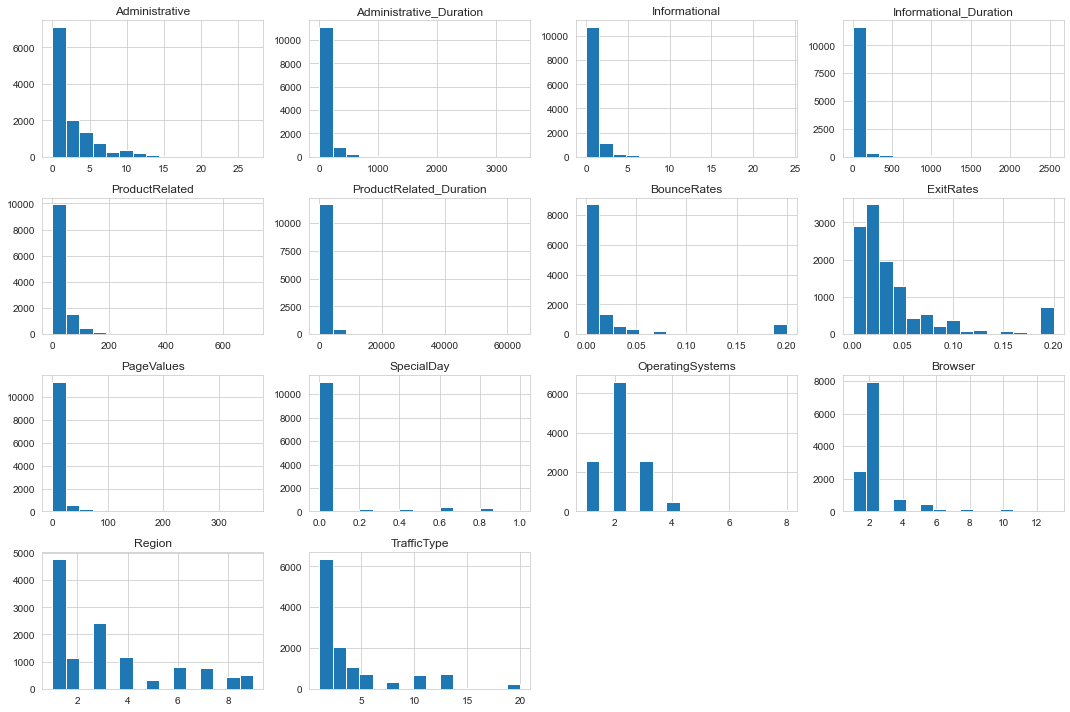

In [10]:
# Plotting histograms for numerical features to understand distributions
numerical_data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()

1. Administrative: Most sessions have few or no administrative page visits, with a sharp decline as the number increases.

2. Administrative_Duration: Similar to the Administrative plot, the duration is heavily skewed towards shorter visits.

3. Informational: This plot also shows that most sessions don't include visits to informational pages, with the numbers dropping off rapidly for sessions that do.

4. Informational_Duration: Again, most users spend little to no time on informational pages.

5. ProductRelated: The majority of sessions have less than 100 related product page visits, but there's a long tail, suggesting some users browse much more.

6. ProductRelated_Duration: Reflecting the ProductRelated visits, there's a right skew indicating most users spend less time, with a few sessions having very long durations.

7. BounceRates: The distribution is heavily skewed towards lower bounce rates, suggesting most users visit more than one page.

8. ExitRates: Similar to bounce rates, most users have lower exit rates, but there's more variability.

9. PageValues: Most sessions have a page value of zero, indicating no transactions occurred, but there are sessions with higher values, showing some transactions do happen.

10. SpecialDay: Almost all sessions occur on non-special days; very few sessions are close to special days.

11. OperatingSystems: A few operating systems dominate, with systems 2 and 1 being the most common.

12. Browser: Similar to operating systems, a couple of browsers are most common, with browser 2 being the most used.

13. Region: Users from region 1 are the most common, with a gradual decrease in frequency as the region number increases.

14. TrafficType: Types 2, 1, and 3 are the most common traffic sources, with a significant drop-off for other types.

These plots reveal that the dataset is skewed in several dimensions—most sessions involve few interactions and short durations, with a few exceptions. There's also a dominance of certain categories in operating systems and browsers, which may reflect the user base or market penetration of these technologies.

For clustering, standardization will be critical because the scale of the different numerical features varies widely. Additionally, given the prevalence of zero values in several features, the clustering algorithm might need to be chosen or adjusted to handle sparse data effectively.

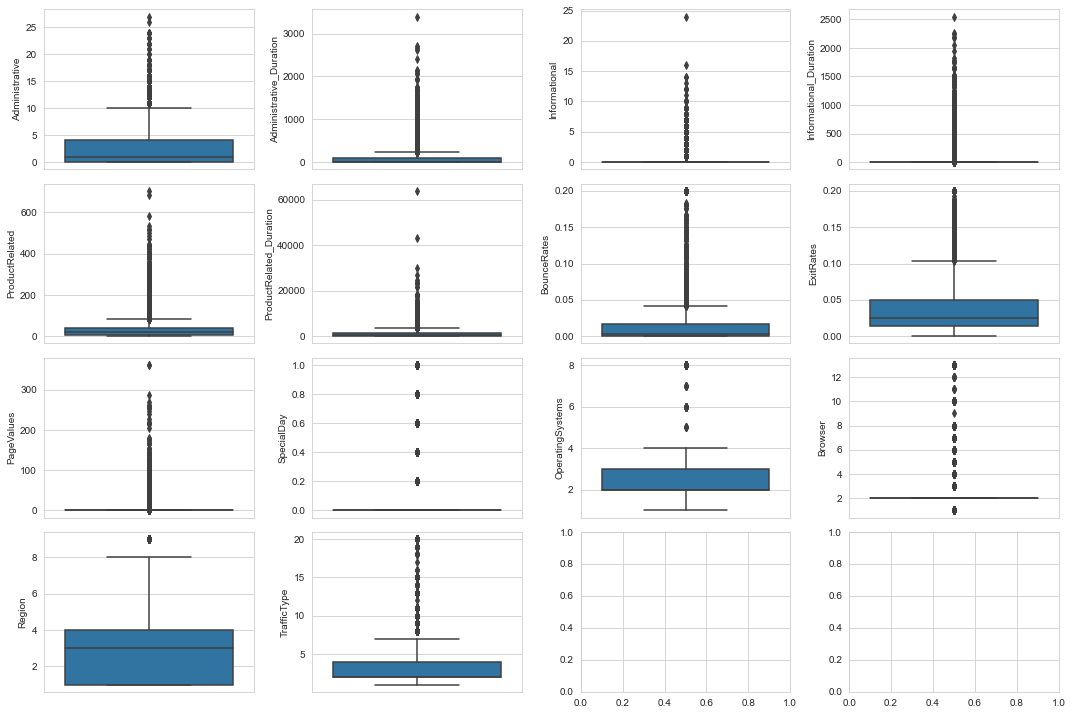

In [11]:
# Box plots to check for outliers
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
for i, column in enumerate(numerical_data.columns):
    sns.boxplot(y=column, data=numerical_data, ax=axes[i//4, i%4])
plt.tight_layout()

1. Administrative: The majority of values are low with a median near 0, but there are numerous outliers indicating some sessions with a high number of administrative pages visited.

2. Administrative_Duration: A similar trend to the Administrative feature with many outliers, showing sessions where a significantly higher amount of time is spent.

3. Informational: Most sessions contain no informational page visits, but there are outliers that show some sessions with a higher count.

4. Informational_Duration: Reflecting the Informational plot, most durations are near zero with several high-duration outliers.

5. ProductRelated: This feature has a higher median compared to Administrative and Informational, suggesting users interact with product-related pages more frequently. Outliers indicate some sessions with an exceptionally high number of product page visits.

6. ProductRelated_Duration: In line with ProductRelated, a broad range of durations with significant outliers suggests some users spend a lot of time on product-related pages.

7. BounceRates: The data is skewed towards lower bounce rates, with a few outliers on the higher end.

8. ExitRates: Similar to BounceRates, most sessions have a low exit rate, but there are sessions with higher exit rates as indicated by outliers.

9. PageValues: The majority of sessions have a PageValue of zero, indicating no transactions, with a long tail of outliers representing sessions with high page values.

10. SpecialDay: Almost all values are 0, suggesting that most sessions are not close to special days, with some exceptions.

11. OperatingSystems: There's a spread of different operating systems used, but it's less varied than some other features. There are few outliers.

12. Browser: Most users use a small number of browser types, though there are sessions with less common browsers.

13. Region: Users from some regions are more prevalent than others, but the distribution is more uniform compared to other features, and there are few outliers.

14. TrafficType: There's a relatively small range of common traffic types with some outliers.

The presence of outliers in many features suggests that data transformation or outlier handling may be necessary before clustering to prevent these extreme values from disproportionately influencing the model. Additionally, considering the skewed distributions and the prevalence of zeros, particularly in PageValues and SpecialDay, it might be useful to consider non-linear transformations or specific clustering algorithms that are robust to outliers.

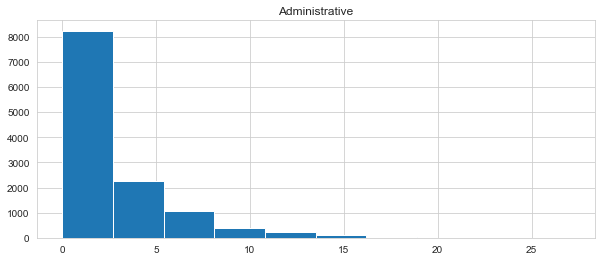

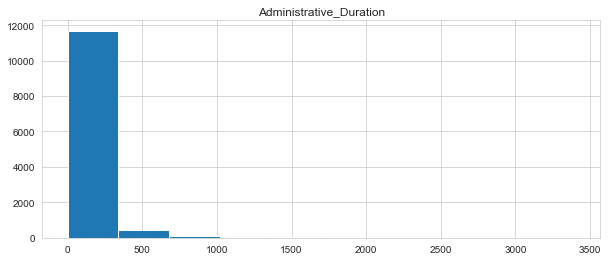

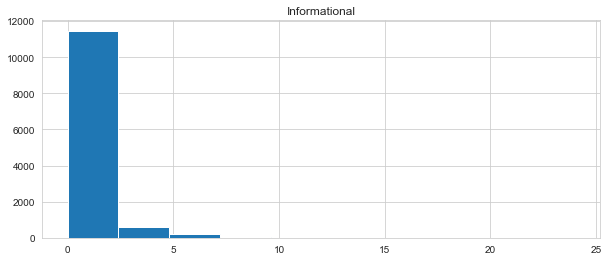

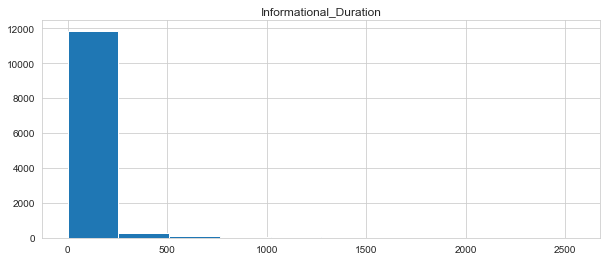

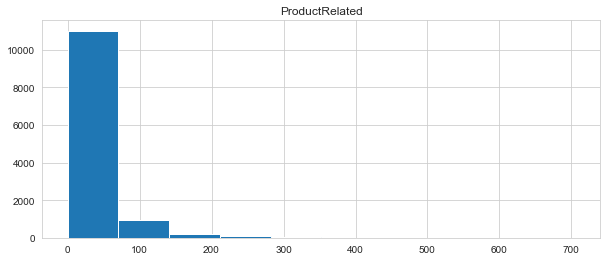

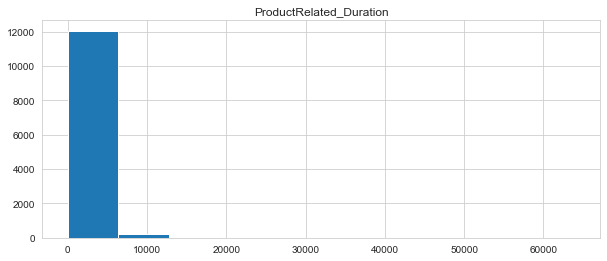

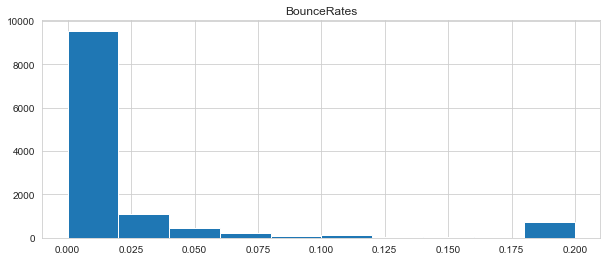

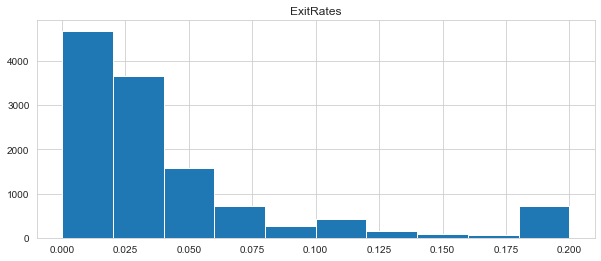

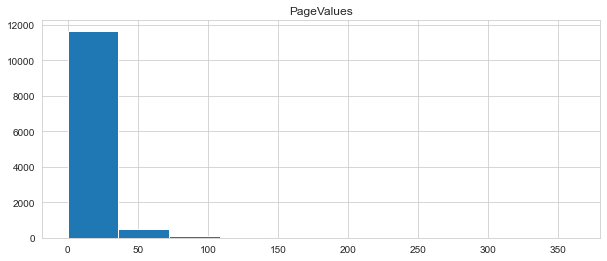

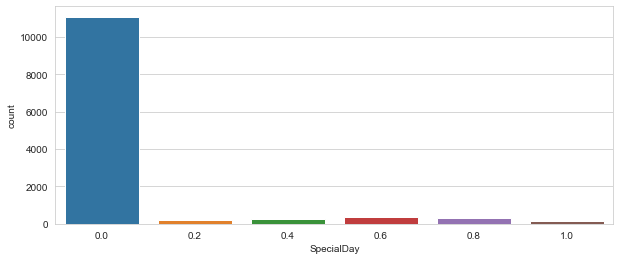

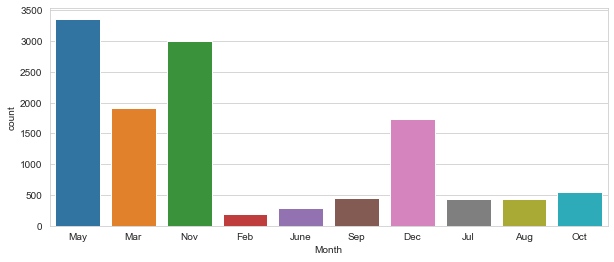

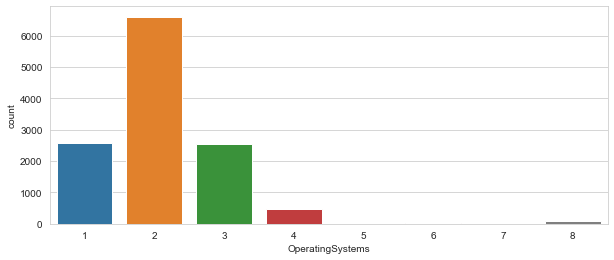

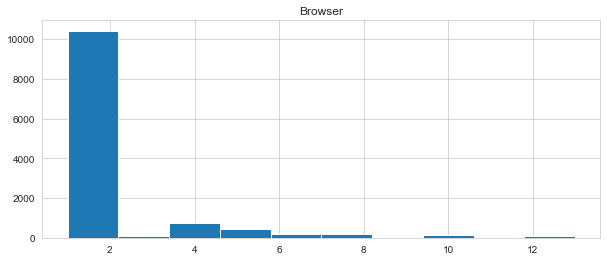

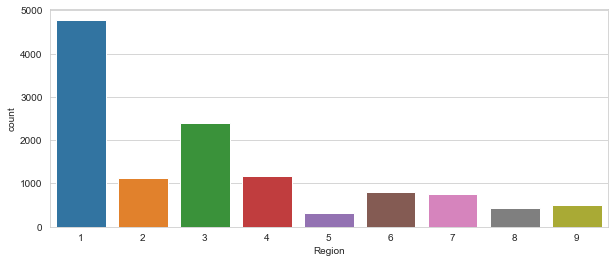

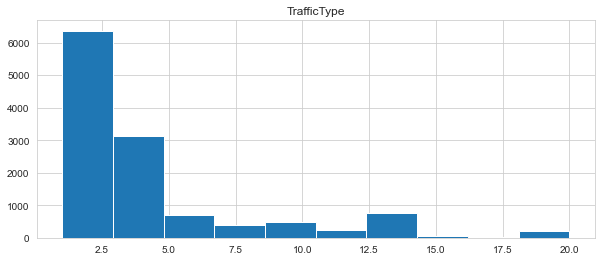

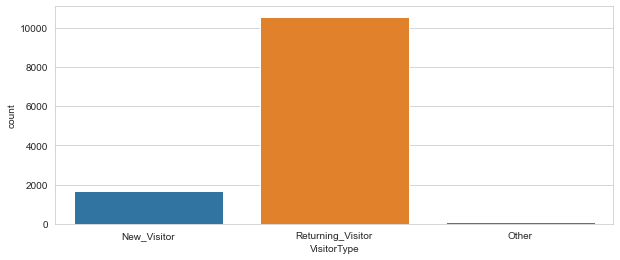

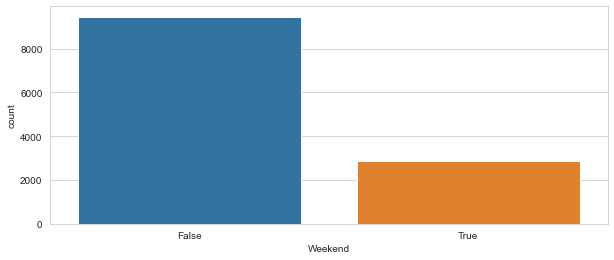

In [12]:
# Visualizations: histograms for numerical features and count plots for categorical features
def plot_data(data):
    for column in data.columns:
        plt.figure(figsize=(10, 4))
        if data[column].dtype == 'object' or data[column].nunique() < 10:
            # Use count plot for categorical data
            sns.countplot(x=column, data=data)
        else:
            # Use histogram for numerical data
            data[column].hist()
            plt.title(column)
        plt.show()
        
plot_data(data)

1. Numerical Features (Histograms):
* Administrative, Informational, ProductRelated: Most users interact with these pages minimally, suggesting that a large number of sessions involve limited engagement with these page types.
* Administrative_Duration, Informational_Duration, ProductRelated_Duration: Similar to the page counts, the duration on these page types is skewed towards lower values, indicating short interaction times for most sessions.
* BounceRates, ExitRates: These rates are skewed towards lower values, which could indicate good user engagement for many sessions.
* PageValues: Most pages have a value of zero, suggesting that only a few pages contribute significantly to the overall value generated from a user session.

2. Categorical Features (Count Plots):
* Month: Shows the distribution of sessions across different months, which could be useful for identifying seasonal trends.
* OperatingSystems, Browser, Region, TrafficType: These plots provide insights into the diversity of the user base in terms of their technology usage and geographic distribution.
* VisitorType: Most visitors are returning, which could be a positive indicator of site loyalty or engagement.
* Weekend: More sessions occur on weekdays than weekends.

# 2. Pre-Clustering Data Preparation

In [13]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [14]:
numerical_var = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
categorical_var = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
etc_var = ['Administrative','Informational','ProductRelated']

In [15]:
# Define the transformers for the numerical columns
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())  # Standardize the numerical features
])

# Combine transformers into a preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_var),
        ('cat', 'passthrough', categorical_var),
        ('etc', 'passthrough', etc_var)
    ])

# Apply transformations to the data
data_prepared = preprocessor.fit_transform(data)

# Combine all column names: numerical, categorical, and etc_var
new_columns = numerical_var + categorical_var + etc_var

# Now create the DataFrame with the correct column names
data_prepared = pd.DataFrame(data_prepared, columns=new_columns)

data_prepared.head()

Administrative_Duration Informational_Duration ProductRelated_Duration  \
0                     0.0                    0.0                 0.00347   
1                     0.0                    0.0                0.016218   
2                0.011033               0.032165                 0.00151   
3                0.034042                    0.0                0.010245   
4                0.017654               0.005884                0.010476   

  BounceRates ExitRates PageValues SpecialDay Month OperatingSystems Browser  \
0         0.0  0.142857   0.147816        0.0   May                1       1   
1    0.071429  0.238095        0.0        0.0   Mar                2       2   
2         0.0    0.0875        0.0        0.0   Nov                2       2   
3         0.0  0.060185        0.0        0.0   Nov                1       1   
4         0.0  0.019231        0.0        0.0   May                2       2   

  Region TrafficType        VisitorType Weekend Administrative Informational  \
0      1           2        New_Visitor    True              0             0   
1      4           2  Returning_Visitor   False              0             0   
2      9           2        New_Visitor   False              4             2   
3      2           3  Returning_Visitor   False              4             0   
4      3           4  Returning_Visitor   False              1             1   

  ProductRelated  
0              8  
1             14  
2              4  
3             16  
4             26

In [16]:
# Apply mappings and transformations to 'Month'
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
data_prepared['Month'] = data_prepared['Month'].map(Month)

In [17]:
# Apply mappings and transformations to 'VisitorType'
# Initialize label encoder
label_encoder = LabelEncoder()
# Apply label encoder on 'VisitorType'
data_prepared['VisitorType'] = label_encoder.fit_transform(data_prepared['VisitorType'])

In [18]:
data_prepared['Weekend'] = data_prepared['Weekend'].astype(int)

In [19]:
data_prepared.head()

Administrative_Duration Informational_Duration ProductRelated_Duration  \
0                     0.0                    0.0                 0.00347   
1                     0.0                    0.0                0.016218   
2                0.011033               0.032165                 0.00151   
3                0.034042                    0.0                0.010245   
4                0.017654               0.005884                0.010476   

  BounceRates ExitRates PageValues SpecialDay  Month OperatingSystems Browser  \
0         0.0  0.142857   0.147816        0.0      5                1       1   
1    0.071429  0.238095        0.0        0.0      3                2       2   
2         0.0    0.0875        0.0        0.0     11                2       2   
3         0.0  0.060185        0.0        0.0     11                1       1   
4         0.0  0.019231        0.0        0.0      5                2       2   

  Region TrafficType  VisitorType  Weekend Administrative Informational  \
0      1           2            0        1              0             0   
1      4           2            2        0              0             0   
2      9           2            0        0              4             2   
3      2           3            2        0              4             0   
4      3           4            2        0              1             1   

  ProductRelated  
0              8  
1             14  
2              4  
3             16  
4             26

* Scaling: The numerical variables such as 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', and 'PageValues' have been scaled using MinMaxScaler. This scaling adjusts these values to a common scale without distorting differences in the ranges of values.

* Pass-through: The categorical variables 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', and 'Weekend' were passed through without any transformation initially. However, 'Month' and 'VisitorType' received additional processing later.

* Mapping: The 'Month' column was transformed from string values to numerical representations (e.g., 'Feb' to 2, 'Mar' to 3).

* Encoding: The 'VisitorType' column was one-hot encoded, creating separate columns for each visitor type and indicating their presence with 0s and 1s. The original 'VisitorType' column was then dropped.

* Conversion: The 'Weekend' column was converted to an integer type to ensure consistency for any subsequent modeling or analysis.

### Categorical data Encoding

In [20]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap

# Selecting the columns to be one-hot encoded
columns_to_encode = ['Month', 'OperatingSystems', 'Region', 'VisitorType']

# Performing one-hot encoding
encoded_data = encoder.fit_transform(data_prepared[columns_to_encode])

# Creating a DataFrame for the encoded columns
encoded_columns = []
for col, categories in zip(columns_to_encode, encoder.categories_):
    encoded_columns.extend([f"{col}_{int(cat)}" for cat in categories[1:]])  # Skipping the first category
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

In [21]:
# For Browser, we group less common browsers into an 'Other' category (assuming categories > 10 are less common)
data_prepared['Browser_Grouped'] = data_prepared['Browser'].apply(lambda x: x if x <= 10 else 'Other')
# Apply one-hot encoding to the Browser_Grouped
browser_encoded = pd.get_dummies(data_prepared['Browser_Grouped'], prefix='Browser', drop_first=True)

In [22]:
# For TrafficType, we'll use frequency encoding
traffic_frequency = data_prepared['TrafficType'].value_counts(normalize=True)
data_prepared['TrafficType_Freq'] = data_prepared['TrafficType'].map(traffic_frequency)

In [23]:
# Drop the original categorical columns from the original dataset
data_dropped = data_prepared.drop(columns_to_encode + ['Browser', 'TrafficType', 'Browser_Grouped'], axis=1)

# Merge the encoded categorical features back into the original dataframe
data_encoded = pd.concat([data_dropped, encoded_df, browser_encoded, data_prepared['TrafficType_Freq']], axis=1)

data_encoded.head()

Administrative_Duration Informational_Duration ProductRelated_Duration  \
0                     0.0                    0.0                 0.00347   
1                     0.0                    0.0                0.016218   
2                0.011033               0.032165                 0.00151   
3                0.034042                    0.0                0.010245   
4                0.017654               0.005884                0.010476   

  BounceRates ExitRates PageValues SpecialDay  Weekend Administrative  \
0         0.0  0.142857   0.147816        0.0        1              0   
1    0.071429  0.238095        0.0        0.0        0              0   
2         0.0    0.0875        0.0        0.0        0              4   
3         0.0  0.060185        0.0        0.0        0              4   
4         0.0  0.019231        0.0        0.0        0              1   

  Informational  ... Browser_3  Browser_4  Browser_5  Browser_6  Browser_7  \
0             0  ...         0          0          0          0          0   
1             0  ...         0          0          0          0          0   
2             2  ...         0          0          0          0          0   
3             0  ...         0          0          0          0          0   
4             1  ...         0          0          0          0          0   

   Browser_8  Browser_9  Browser_10  Browser_Other  TrafficType_Freq  
0          0          0           0              0          0.317356  
1          0          0           0              0          0.317356  
2          0          0           0              0          0.317356  
3          0          0           0              0          0.166423  
4          0          0           0              0          0.086699  

[5 rows x 49 columns]

* Month (10 unique values): One-hot encoding could work since there aren't too many unique values. However, if there's a temporal trend, encoding them as numerical (1-12) while acknowledging the ordinal nature might be better.
* OperatingSystems (8 unique values): One-hot encoding is suitable here since the number of unique values is manageable.
* Browser (13 unique values): Given the relatively higher number of browsers, you might consider combining less common browsers into an 'Other' category before applying one-hot encoding.
* Region (9 unique values): One-hot encoding is feasible due to the limited number of regions.
* TrafficType (20 unique values): This has more unique values, so consider grouping less common traffic types or using frequency encoding to avoid high dimensionality.
* VisitorType (3 unique values): One-hot encoding is ideal here due to the low number of categories.
* Weekend, no encoding is needed as it's already binary.

### Remove high multicollinearity variables

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# Selecting numerical features for VIF computation
numerical_features = data_encoded.select_dtypes(include=[np.number])

# Function to calculate VIF for the provided DataFrame
def calculate_vif(dataframe):
    vif_df = pd.DataFrame()
    vif_df['Feature'] = dataframe.columns
    vif_df['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_df

# Calculate VIF for the numerical features
vif_df = calculate_vif(numerical_features)

# Filter out features with a high VIF (threshold of 10)
high_vif_features = vif_df[vif_df['VIF'] > 10]['Feature']

# If there are any high VIF features, we will drop them and recalculate the VIF
if not high_vif_features.empty:
    reduced_features = numerical_features.drop(columns=high_vif_features)
    reduced_vif_df = calculate_vif(reduced_features)
else:
    reduced_vif_df = vif_df

reduced_vif_df

/Users/minjae/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Feature       VIF
0              Weekend  1.321124
1              Month_3  2.224241
2              Month_5  3.287458
3              Month_6  1.192024
4              Month_7  1.289020
5              Month_8  1.263852
6              Month_9  1.245600
7             Month_10  1.299747
8             Month_11  2.837357
9             Month_12  2.002273
10  OperatingSystems_3  1.392161
11  OperatingSystems_4  1.061856
12  OperatingSystems_5  1.209184
13  OperatingSystems_6  1.006662
14  OperatingSystems_7  1.002611
15  OperatingSystems_8  2.304633
16            Region_2  1.238851
17            Region_3  1.494174
18            Region_4  1.248019
19            Region_5  1.067589
20            Region_6  1.171287
21            Region_7  1.163555
22            Region_8  1.095340
23            Region_9  1.239985
24       VisitorType_1  2.116196
25       VisitorType_2  6.608149
26           Browser_3  1.044854
27           Browser_4  1.098004
28           Browser_5  1.058722
29           Browser_6  1.022390
30           Browser_7  1.007990
31           Browser_8  1.020654
32           Browser_9  1.003177
33          Browser_10  1.024876
34       Browser_Other  2.629187

In [26]:
df = data_encoded.drop(columns=high_vif_features)
df.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Weekend', 'Administrative', 'Informational',
       'ProductRelated', 'Month_3', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'VisitorType_1', 'VisitorType_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
       'Browser_Other'],
      dtype='object')

# 3. Cluster Modeling

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

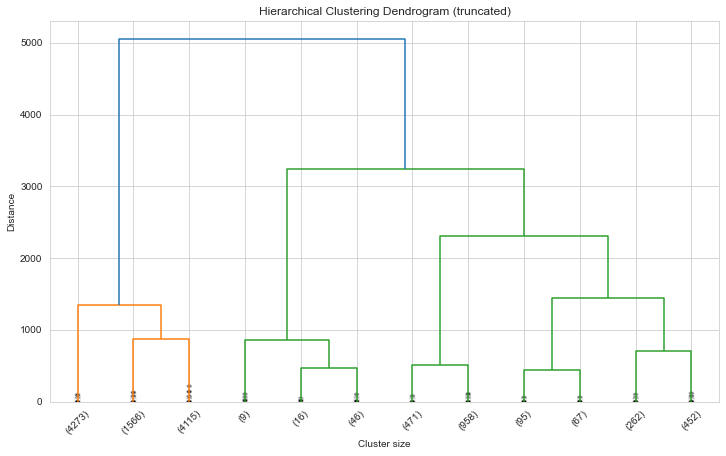

In [28]:
Z = linkage(df, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

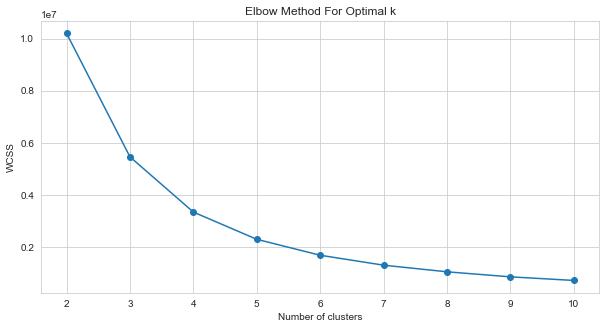

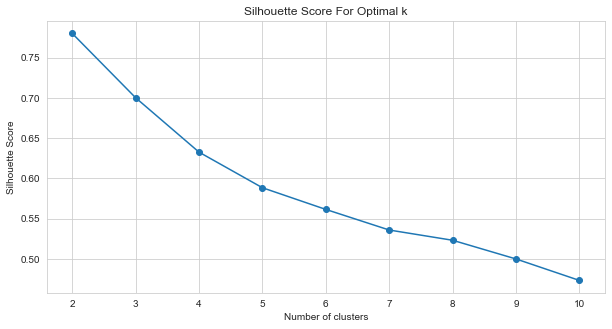

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []
K_range = range(2, 11)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42).fit(df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(K_range, wcss, 'o-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, 'o-')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(df)
cluster_labels = kmeans.labels_

# Add the cluster labels to your dataframe to explore the clusters
df['Cluster'] = cluster_labels

/var/folders/gl/hkj_86357f7cty4knl92kz6h0000gn/T/ipykernel_742/2055370499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster_labels


* Hierarchical Clustering Dendrogram Interpretation:  
The dendrogram shows how individual data points are merged into clusters. The vertical lines represent merges, and their length indicates the distance at which the merges occur. Observing the dendrogram, we can look for the largest vertical lines that don't intersect extended horizontal lines, which suggests a natural division in the dataset.  
From the provided dendrogram, there's a significant merge represented by the blue line high on the y-axis, which suggests a larger distance (or dissimilarity) between the merged clusters. Below this blue line, we see three distinct vertical lines, which would indicate a recommendation of three clusters as a natural grouping for the data.

* Elbow Plot Interpretation:  
The elbow plot displays the within-cluster sum of squares (WCSS) against the number of clusters (K). We look for an "elbow" where the reduction in WCSS begins to slow down, indicating diminishing returns in terms of variance explained. In your plot, the elbow isn't sharply defined but appears to be around K=3 or K=4, where the slope of the line starts to flatten.

* Silhouette Score Plot Interpretation:  
The silhouette score plot shows how close each point in one cluster is to points in the neighboring clusters, thus providing a way to assess the strength and validity of the clustering. Higher scores typically indicate better-defined clusters. From the silhouette plot, the score is highest for K=2 and decreases as K increases. This suggests that two clusters might provide the most separate and well-defined grouping according to the silhouette score.

* Reconciliation of Cluster Counts:  
The dendrogram suggests three clusters could be a natural division within the data. However, the silhouette plot suggests two clusters as having the highest silhouette score, indicating better separation at K=2. The elbow method suggests somewhere between K=3 and K=4.  
This discrepancy is common in clustering and can be due to the different ways these methods measure cluster quality. The dendrogram focuses on distance at cluster merges, the elbow plot on variance within clusters, and the silhouette score on separation between clusters.

* K-means Clustering with K=2:  
When you apply K-means clustering with K=2, as suggested by the silhouette plot, you should analyze the characteristics of each cluster to understand the behavior and properties of the data points within them. It could be that two broad categories best describe the variance in the data, despite the dendrogram suggesting a finer division.

* Cluster Modeling Conclusion:  
The different methods provide different suggestions for the number of clusters. Since K-means with K=2 gives the highest silhouette score, it may provide a good starting point for further analysis, but it's essential to consider the context and use case for the clustering. For example, if the goal is to target marketing campaigns, broader clusters might be more useful, whereas finer clusters could be better for a more personalized approach. Ultimately, the choice of K should be guided by the specific objectives of the analysis and any actionable insights the clusters might yield.

# 4. Post-Clustering Exploratory Data Analysis

In [31]:
key_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Cluster']

In [32]:
# Calculate summary statistics for each cluster
df_key = df[key_features]
cluster_summary = df_key.groupby('Cluster').describe().T
cluster_summary

Cluster                               0           1
Administrative_Duration count   11371.0  959.000000
                        unique   2828.0  738.000000
                        top         0.0    0.000000
                        freq     5758.0  145.000000
Informational_Duration  count   11371.0  959.000000
                        unique    987.0  451.000000
                        top         0.0    0.000000
                        freq     9509.0  416.000000
ProductRelated_Duration count   11371.0  959.000000
                        unique   8593.0  959.000000
                        top         0.0    0.108670
                        freq      755.0    1.000000
BounceRates             count   11371.0  959.000000
                        unique   1271.0  754.000000
                        top         0.0    0.000000
                        freq     5408.0  110.000000
ExitRates               count   11371.0  959.000000
                        unique   3848.0  958.000000
                        top         1.0    0.055921
                        freq      710.0    2.000000
PageValues              count   11371.0  959.000000
                        unique   2208.0  497.000000
                        top         0.0    0.000000
                        freq     9137.0  463.000000

1. Administrative_Duration:
* Both clusters have many observations, with Cluster 0 having more than Cluster 1.
* The most frequent value in both clusters is 0, which could indicate a large number of users did not spend time on administrative pages.
* The higher number of unique values in Cluster 0 suggests more varied behavior regarding the duration spent on administrative pages.

2. Informational_Duration:
* Similar to Administrative_Duration, the most common duration is 0 in both clusters.
* Cluster 0 has more unique durations than Cluster 1, again indicating a wider range of behavior in Cluster 0.

3. ProductRelated_Duration:
* In Cluster 1, the most common duration is higher than in Cluster 0, which suggests that users in Cluster 1 might be more engaged with product-related pages.
* The unique counts are equal to the count in Cluster 1, which means every user in that cluster has a different ProductRelated_Duration. This is peculiar and warrants further investigation.

5. BounceRates:
* The most frequent bounce rate is 0 in both clusters, suggesting many users did not leave the site after viewing only one page.
* Cluster 1 has more unique bounce rates than Cluster 0, possibly indicating more variability in how users interact with the site.

6. ExitRates:
* The most frequent exit rate in Cluster 0 is 1, which could indicate pages where users are more likely to leave the site.
* Cluster 1 has a lower most frequent exit rate (0.055921), which might indicate that pages in Cluster 1 have better retention.

7. PageValues:
* The most frequent page value in both clusters is 0, which may suggest that many pages do not directly contribute to e-commerce transactions.
* Cluster 1 has fewer unique page values, which could indicate less variation in how pages contribute to transactions in this cluster.

### Conclusions:
* Cluster 0 seems to have a more varied range of user behaviors but with a tendency towards lower engagement or effectiveness (e.g., higher most frequent exit rate).
* Cluster 1 shows signs of higher engagement or page effectiveness (e.g., higher product-related duration and lower most frequent exit rate), but less variation in behavior.

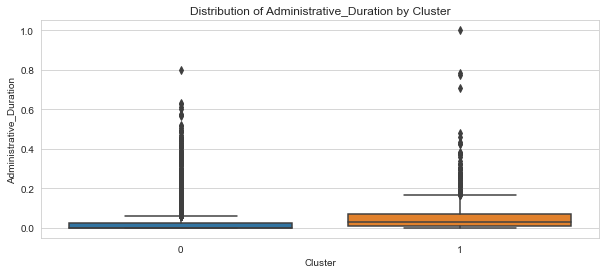

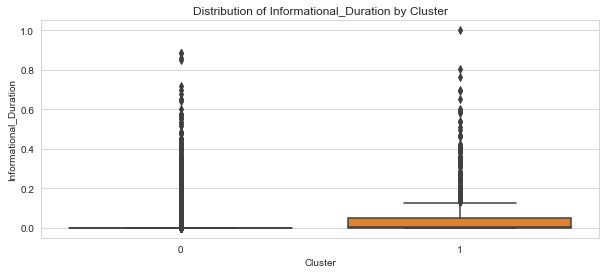

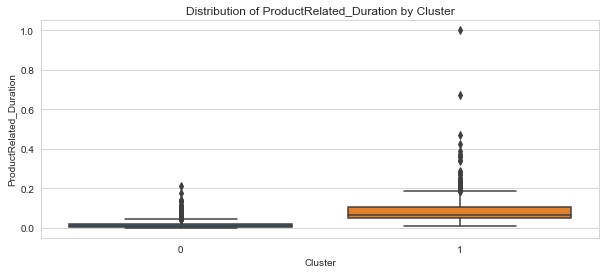

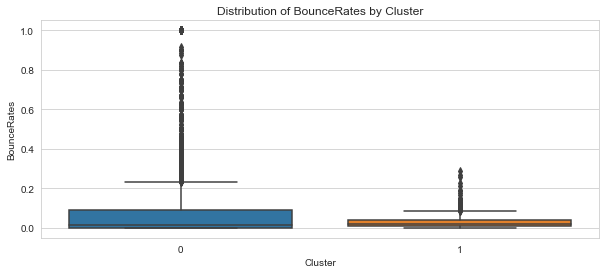

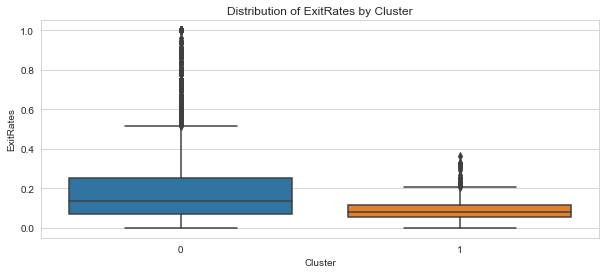

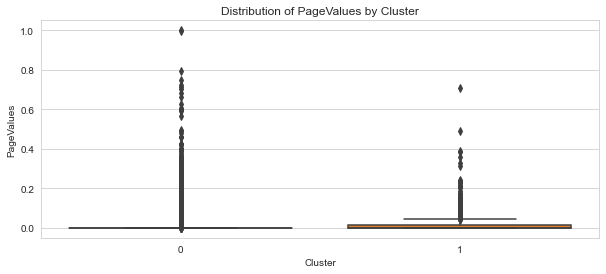

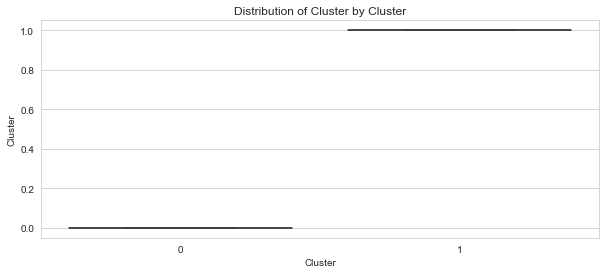

In [33]:
# Visualize the distributions for some key features
for feature in key_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

1. Administrative_Duration:
* The distribution of durations in Cluster 0 is largely concentrated at the lower end, but with some outliers extending to higher values.
* Cluster 1 has a higher median and more interquartile range spread, indicating that users in this cluster generally spend more time on administrative pages.

2. Informational_Duration:
* Again, Cluster 0 has most values concentrated near 0 with a few outliers.
* Cluster 1 shows a slightly higher median and a greater spread of durations, suggesting users in this cluster engage more with informational content.

3. ProductRelated_Duration:
* Cluster 0 shows a pattern similar to the previous features, with a concentration of values near 0 and some outliers.
* In Cluster 1, users seem to spend significantly more time on product-related pages, as indicated by the median and the spread of values.

4. BounceRates:
* The bounce rates for Cluster 0 are spread out, with a lower median, but with many high-value outliers.
* Cluster 1 has a higher median bounce rate and fewer outliers, suggesting users in this cluster are more likely to leave after viewing only one page.

5. ExitRates:
* Cluster 0 has a broader distribution of exit rates, with a median towards the lower end but many high-value outliers.
* Cluster 1's median is slightly higher with fewer high-value outliers, indicating users in this cluster are more likely to exit the site from the pages they visit.

6. PageValues:
* In Cluster 0, the page values are mostly concentrated at the bottom, but there are several high-value outliers.
* Cluster 1 has a higher median page value with fewer outliers, implying that pages visited by users in this cluster tend to contribute more to transactions.

### Conclusions:
* Cluster 0 is characterized by shorter durations on different types of pages and lower page values, but with a substantial number of outliers suggesting some highly engaged users are present in this cluster as well.
* Cluster 1 generally indicates a group of users with higher engagement (longer durations, especially on product-related pages) and higher page value interactions, implying potentially more valuable browsing behavior in terms of e-commerce.

These differences between the clusters could be significant for an online retailer. Users in Cluster 1 may represent more engaged visitors, possibly with a higher intent to purchase, while Cluster 0 contains users with varied engagement, including some who are highly engaged but many who are not. Strategies such as targeted marketing and personalized content could be developed differently for each cluster to improve user engagement and conversion rates.

# 5. Clustering Output vs. Actual Labels

In [34]:
df['Revenue'] = cluster_labels

/var/folders/gl/hkj_86357f7cty4knl92kz6h0000gn/T/ipykernel_742/1230525705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = cluster_labels


In [35]:
df.head()

Administrative_Duration Informational_Duration ProductRelated_Duration  \
0                     0.0                    0.0                 0.00347   
1                     0.0                    0.0                0.016218   
2                0.011033               0.032165                 0.00151   
3                0.034042                    0.0                0.010245   
4                0.017654               0.005884                0.010476   

  BounceRates ExitRates PageValues SpecialDay  Weekend Administrative  \
0         0.0  0.142857   0.147816        0.0        1              0   
1    0.071429  0.238095        0.0        0.0        0              0   
2         0.0    0.0875        0.0        0.0        0              4   
3         0.0  0.060185        0.0        0.0        0              4   
4         0.0  0.019231        0.0        0.0        0              1   

  Informational  ... Browser_4  Browser_5  Browser_6  Browser_7  Browser_8  \
0             0  ...         0          0          0          0          0   
1             0  ...         0          0          0          0          0   
2             2  ...         0          0          0          0          0   
3             0  ...         0          0          0          0          0   
4             1  ...         0          0          0          0          0   

   Browser_9  Browser_10  Browser_Other  Cluster  Revenue  
0          0           0              0        0        0  
1          0           0              0        0        0  
2          0           0              0        0        0  
3          0           0              0        0        0  
4          0           0              0        0        0  

[5 rows x 47 columns]

In [36]:
if 'Cluster' in df.columns:
    df.drop('Cluster', axis=1, inplace=True)
df.head()

/Users/minjae/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Administrative_Duration Informational_Duration ProductRelated_Duration  \
0                     0.0                    0.0                 0.00347   
1                     0.0                    0.0                0.016218   
2                0.011033               0.032165                 0.00151   
3                0.034042                    0.0                0.010245   
4                0.017654               0.005884                0.010476   

  BounceRates ExitRates PageValues SpecialDay  Weekend Administrative  \
0         0.0  0.142857   0.147816        0.0        1              0   
1    0.071429  0.238095        0.0        0.0        0              0   
2         0.0    0.0875        0.0        0.0        0              4   
3         0.0  0.060185        0.0        0.0        0              4   
4         0.0  0.019231        0.0        0.0        0              1   

  Informational  ... Browser_3  Browser_4  Browser_5  Browser_6  Browser_7  \
0             0  ...         0          0          0          0          0   
1             0  ...         0          0          0          0          0   
2             2  ...         0          0          0          0          0   
3             0  ...         0          0          0          0          0   
4             1  ...         0          0          0          0          0   

   Browser_8  Browser_9  Browser_10  Browser_Other  Revenue  
0          0          0           0              0        0  
1          0          0           0              0        0  
2          0          0           0              0        0  
3          0          0           0              0        0  
4          0          0           0              0        0  

[5 rows x 46 columns]

In [37]:
labels.rename(columns={"Revenue":"V_Revenue"}, inplace=True)
labels

V_Revenue
0           True
1          False
2          False
3          False
4          False
...          ...
12325      False
12326      False
12327      False
12328      False
12329      False

[12330 rows x 1 columns]

In [38]:
df_new = pd.concat([df, labels], axis=1)
df_new.head()

Administrative_Duration Informational_Duration ProductRelated_Duration  \
0                     0.0                    0.0                 0.00347   
1                     0.0                    0.0                0.016218   
2                0.011033               0.032165                 0.00151   
3                0.034042                    0.0                0.010245   
4                0.017654               0.005884                0.010476   

  BounceRates ExitRates PageValues SpecialDay  Weekend Administrative  \
0         0.0  0.142857   0.147816        0.0        1              0   
1    0.071429  0.238095        0.0        0.0        0              0   
2         0.0    0.0875        0.0        0.0        0              4   
3         0.0  0.060185        0.0        0.0        0              4   
4         0.0  0.019231        0.0        0.0        0              1   

  Informational  ... Browser_4  Browser_5  Browser_6  Browser_7  Browser_8  \
0             0  ...         0          0          0          0          0   
1             0  ...         0          0          0          0          0   
2             2  ...         0          0          0          0          0   
3             0  ...         0          0          0          0          0   
4             1  ...         0          0          0          0          0   

   Browser_9  Browser_10  Browser_Other  Revenue  V_Revenue  
0          0           0              0        0       True  
1          0           0              0        0      False  
2          0           0              0        0      False  
3          0           0              0        0      False  
4          0           0              0        0      False  

[5 rows x 47 columns]

In [39]:
le = LabelEncoder()

# Apply LabelEncoder to the 'V_Revenue' column
df_new['V_Revenue'] = le.fit_transform(df_new['V_Revenue'])

df_new.head()

Administrative_Duration Informational_Duration ProductRelated_Duration  \
0                     0.0                    0.0                 0.00347   
1                     0.0                    0.0                0.016218   
2                0.011033               0.032165                 0.00151   
3                0.034042                    0.0                0.010245   
4                0.017654               0.005884                0.010476   

  BounceRates ExitRates PageValues SpecialDay  Weekend Administrative  \
0         0.0  0.142857   0.147816        0.0        1              0   
1    0.071429  0.238095        0.0        0.0        0              0   
2         0.0    0.0875        0.0        0.0        0              4   
3         0.0  0.060185        0.0        0.0        0              4   
4         0.0  0.019231        0.0        0.0        0              1   

  Informational  ... Browser_4  Browser_5  Browser_6  Browser_7  Browser_8  \
0             0  ...         0          0          0          0          0   
1             0  ...         0          0          0          0          0   
2             2  ...         0          0          0          0          0   
3             0  ...         0          0          0          0          0   
4             1  ...         0          0          0          0          0   

   Browser_9  Browser_10  Browser_Other  Revenue  V_Revenue  
0          0           0              0        0          1  
1          0           0              0        0          0  
2          0           0              0        0          0  
3          0           0              0        0          0  
4          0           0              0        0          0  

[5 rows x 47 columns]

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate the confusion matrix
conf_matrix = confusion_matrix(df_new['V_Revenue'], df_new['Revenue'])

# Calculate other performance metrics
accuracy = accuracy_score(df_new['V_Revenue'], df_new['Revenue'])
precision = precision_score(df_new['V_Revenue'], df_new['Revenue'])
recall = recall_score(df_new['V_Revenue'], df_new['Revenue'])
f1 = f1_score(df_new['V_Revenue'], df_new['Revenue'])

(metrics_dict := {
    "Confusion Mtrix":conf_matrix,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

{'Confusion Mtrix': array([[9741,  681],
        [1630,  278]]),
 'Accuracy': 0.8125709651257097,
 'Precision': 0.28988529718456724,
 'Recall': 0.14570230607966456,
 'F1 Score': 0.19393093826299268}

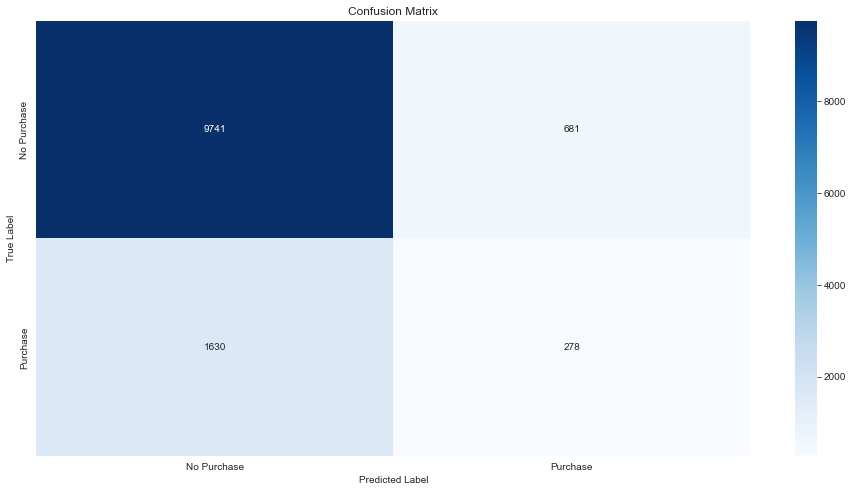

In [41]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(16, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

* The confusion matrix is as follows:
    * True Negatives (TN): 9741
    * False Positives (FP): 681
    * False Negatives (FN): 1630
    * True Positives (TP): 278

- Accuracy: 81.26%, indicating the overall percentage of correctly predicted instances.
- Precision: 28.99%, showing the proportion of predicted positive instances that were actually positive.
- Recall: 14.57%, reflecting the proportion of actual positive instances that were correctly predicted.
- F1-score: 19.39%, which is a harmonic mean of precision and recall.

These metrics indicate that while the algorithm is relatively good at identifying negative cases (non-purchases), it struggles with correctly identifying positive cases (purchases). The low precision, recall, and F1-score suggest that the clustering algorithm's output does not align well with the actual purchase behavior indicated by V_Revenue. This analysis suggests that the clustering algorithm may need improvement or adjustment to better capture the nuances of purchase behavior on the website. ​

# 6. SVM Modeling

In [42]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
X = df_new.drop(['Revenue', 'V_Revenue'], axis=1)
y = df_new['V_Revenue']  # Assuming we are using V_Revenue as the response

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Importance using Random Forest
forest = RandomForestClassifier()
forest.fit(X_scaled, y)
importances = forest.feature_importances_

# Feature selection with RFE
svm = SVC(kernel='linear')
rfe = RFE(estimator=svm, n_features_to_select=10)  # Adjust based on how many features you want
X_rfe = rfe.fit_transform(X_scaled, y)

# Dimensionality Reduction with PCA
pca = PCA(n_components=10)  # Adjust the number of components
X_pca = pca.fit_transform(X_scaled)

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [45]:
# Splitting the RFE-selected features dataset
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

# Training SVM with linear kernel on RFE-selected features
svm_rfe = SVC(kernel='linear')
svm_rfe.fit(X_train_rfe, y_train_rfe)

# Making predictions and evaluating the model
y_pred_rfe = svm_rfe.predict(X_test_rfe)
print("SVM with RFE-selected Features:")
print("Accuracy:", accuracy_score(y_test_rfe, y_pred_rfe))
print("Classification Report:\n", classification_report(y_test_rfe, y_pred_rfe))

SVM with RFE-selected Features:
Accuracy: 0.8967288456339552
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      3192
           1       0.68      0.46      0.55       507

    accuracy                           0.90      3699
   macro avg       0.80      0.71      0.75      3699
weighted avg       0.89      0.90      0.89      3699



In [46]:
# Splitting the PCA-transformed dataset
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Training SVM with linear kernel on PCA-transformed features
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_train_pca, y_train_pca)

# Making predictions and evaluating the model
y_pred_pca = svm_pca.predict(X_test_pca)
print("SVM with PCA-transformed Features:")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_pca))

SVM with PCA-transformed Features:
Accuracy: 0.8629359286293593
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      3192
           1       0.00      0.00      0.00       507

    accuracy                           0.86      3699
   macro avg       0.43      0.50      0.46      3699
weighted avg       0.74      0.86      0.80      3699



/Users/minjae/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/minjae/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/minjae/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7. Select Models

Based on the classification reports, we have results for two SVM models: one with RFE-selected features and the other with PCA-transformed features. We will use these reports to determine the best model according to specific criteria.

* Model Selection Criteria:
    * Accuracy: Often the first metric to look at, but not always the most important one, especially with imbalanced classes.
    * Precision: Important when the cost of false positives is high.
    * Recall: Important when the cost of false negatives is high.
    * F1-Score: A balance between precision and recall, useful when we seek a balance between false positives and negatives.
    * Support: Shows the distribution of the true classes in the test dataset; imbalance can affect other metrics.
    * Simplicity: A simpler model is preferable for interpretability and ease of implementation.
    * Computational Efficiency: Important if the model needs to be deployed in an environment where resources are limited.

The SVM with RFE-selected features has an overall accuracy of approximately 0.897 and the SVM with PCA-transformed features has an accuracy of approximately 0.863. However, the latter model did not predict class 1 (minority class) correctly at all, which is a significant drawback. Here's a detailed evaluation based on the classification reports:

1. Model Evaluation:
* SVM with RFE-Selected Features: This model has a good balance between precision and recall for both classes. Although precision and recall for class 1 (minority class) are lower than for class 0 (majority class), the model still manages to identify class 1 with moderate success. The F1-score, which is the harmonic mean of precision and recall, is decent for class 1 and very good for class 0.
* SVM with PCA-Transformed Features: This model has a high precision and recall for class 0 but failed to identify any instances of class 1. This indicates a model that is overfitting to the majority class and not generalizing well to the minority class.

2. Cross-Validation:
* Performing cross-validation on the training dataset for both models would help to assess the model stability and variance in performance. A model with less variance in cross-validation scores is typically more robust.

3. Preferred Model:
* Considering the metrics and the importance of being able to correctly predict both classes, the SVM with RFE-selected features is the preferred model. It demonstrates a balance between simplicity (as it uses fewer features) and predictive power, which is not solely focused on the majority class.

4. Performance Assessment:
* To assess the final performance, the preferred model (SVM with RFE-selected features) should be applied to the testing dataset, which consists of previously unseen data. This step is crucial for evaluating the generalization capability of the model.
* When applying the model to the test data, we would expect the model's performance metrics to be similar to those observed during training and cross-validation. Any significant deviations might indicate issues with overfitting or a data distribution shift between the training and testing datasets.

# 7. Conclusion

* Based on the classification reports, the SVM with RFE-selected features is the chosen model. It has shown an ability to generalize better than the PCA-based model, as it captures nuances in both classes.
* If the model performs similarly on the testing dataset as it did during cross-validation, it would suggest that the model is likely to perform well in practical applications.
* The next steps would be to perform cross-validation on the SVM with RFE-selected features and then apply the model to the testing data to confirm the expected performance. If performance drops significantly, we would need to investigate further, possibly by adjusting the model, considering additional features, or gathering more or different training data.

### Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score

# Initialize the classifier with RFE-selected features
svm_rfe_cv = SVC(kernel='linear')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_rfe_cv, X_rfe, y, cv=5)

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {cv_mean}')
print(f'Standard deviation of accuracy: {cv_std}')


Cross-validation scores: [0.89172749 0.88240065 0.88442822 0.8864558  0.8811841 ]
Mean accuracy: 0.8852392538523925
Standard deviation of accuracy: 0.003707746780425753


The cross-validation results the model's performance across different subsets of your data. Here's what we can infer from them:
* Cross-validation scores: These are the accuracy scores from each of the 5 folds. They range from approximately 0.882 to 0.887, which indicates that the model's performance is relatively stable across different subsets of the data.
* Mean accuracy: The average accuracy across the 5 folds is about 0.885. This is a strong performance, though it depends on the complexity of the problem and the baseline accuracy (which could be the accuracy of a simple model or the proportion of the majority class).
* Standard deviation of accuracy: At approximately 0.0037, the standard deviation is very low, which suggests that the model's performance is consistent across different folds and is likely to generalize well to unseen data.

When interpreting these results, consider the following:

* The relatively high and consistent cross-validation scores are promising, indicating that the model is not overfitting to a particular subset of the data.
* The low standard deviation implies that the model's accuracy does not fluctuate much across different folds, which is a good sign of its stability.

Given that the mean cross-validation accuracy is close to the accuracy score on the test set from your earlier result (which was around 0.897), your model appears to be performing consistently across both the training and testing sets.

In summary, your preferred model, the SVM with RFE-selected features, is performing as expected based on the cross-validation results. It has shown to be stable and consistent, which are desirable attributes for a predictive model.